# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")


### 2.Read dataset

In [64]:
df = pd.read_csv("store_sharing (1).csv")

In [65]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [150]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [66]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [67]:

df.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [68]:
df['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

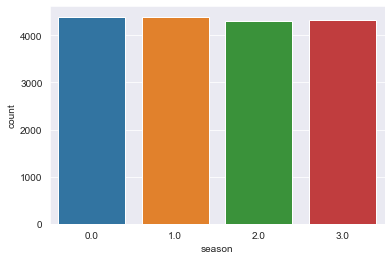

In [69]:
# season
sns.countplot(x='season', data=df)


In [70]:
df['is_holiday'].value_counts()


0.0    17030
1.0      384
Name: is_holiday, dtype: int64

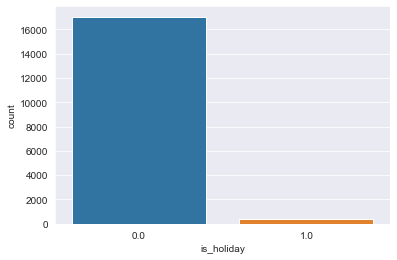

In [71]:
# is_holiday
sns.countplot(x="is_holiday", data=df);


In [72]:
df['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

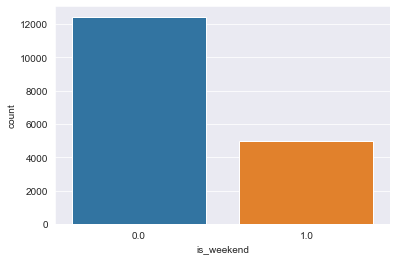

In [73]:
sns.countplot(x="is_weekend", data= df);

In [74]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

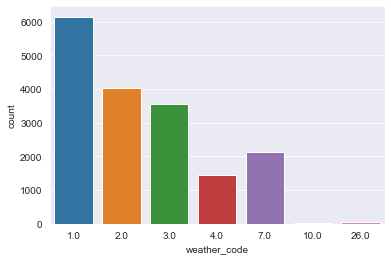

In [75]:
# weather_code
sns.countplot(x="weather_code", data=df);


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [77]:
df.timestamp    #as you see dtype is object

0        2015-01-04 00:00:00
1        2015-01-04 01:00:00
2        2015-01-04 02:00:00
3        2015-01-04 03:00:00
4        2015-01-04 04:00:00
                ...         
17409    2017-01-03 19:00:00
17410    2017-01-03 20:00:00
17411    2017-01-03 21:00:00
17412    2017-01-03 22:00:00
17413    2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: object

In [78]:
pd.to_datetime(df.timestamp) #firstly i changed the dtype to datetime

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [79]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp']   

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [80]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [85]:
df.set_index("timestamp", inplace=True)

In [86]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [87]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [114]:
# day of the week, day of the month, hour, month, season, year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour
df["year_month"] = df.index.strftime('%Y-%m')

In [ ]:
#solution 2
#f = lamba x: x.strftime('%Y-%m')
#df["year_month"] = f(df.index)


In [115]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,day_of_name,hour,year_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,Sunday,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,Sunday,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,Sunday,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,Sunday,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,Sunday,4,2015-01


### 7.Visualize the correlation with a heatmap

In [116]:
sns.color_palette("rocket_r", as_cmap=True)

In [117]:
sns.color_palette("viridis", as_cmap=True)

<AxesSubplot:>

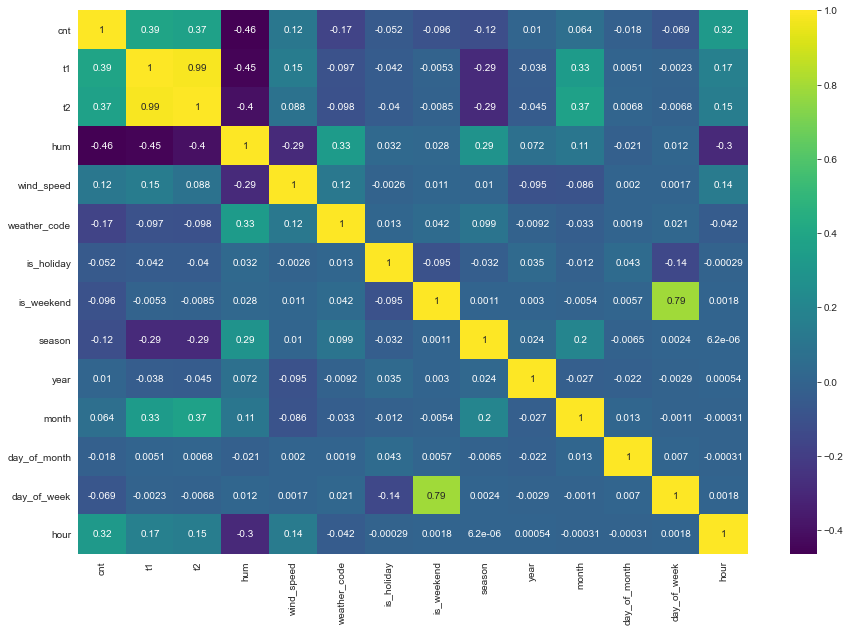

In [118]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap ="viridis",  annot = True)

In [119]:
# for all variables 


<AxesSubplot:>

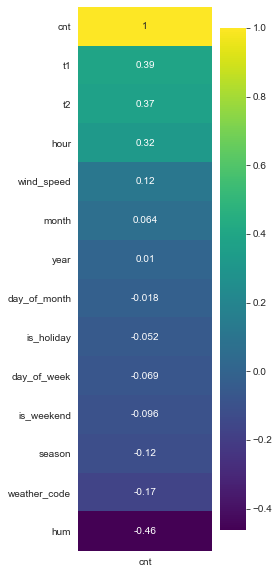

In [120]:
# for the target variable
plt.figure(figsize = (3, 10))
sns.heatmap(df.corr()[["cnt"]].sort_values(by = "cnt", ascending=False), cmap ="viridis",  annot = True)




### 8. Visualize the correlation of the target variable and the other features with barplot

In [121]:
#with pandas
corr_target = df.corr()[["cnt"]].sort_values(by = "cnt", ascending=False)
corr_target

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


<Figure size 1440x432 with 0 Axes>

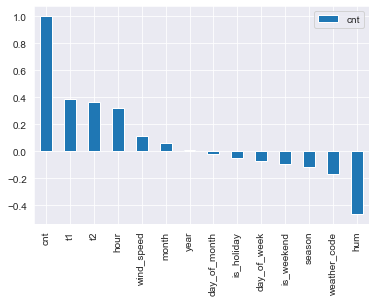

In [122]:
plt.figure(figsize = (20,6))
corr_target.plot.bar()
plt.show()

<Figure size 1440x432 with 0 Axes>

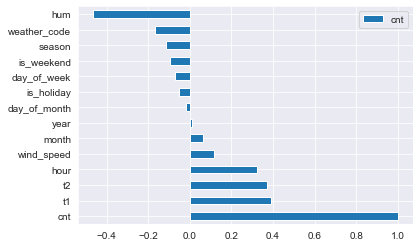

In [123]:
plt.figure(figsize = (20,6))
corr_target.plot.barh()
plt.show()

### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

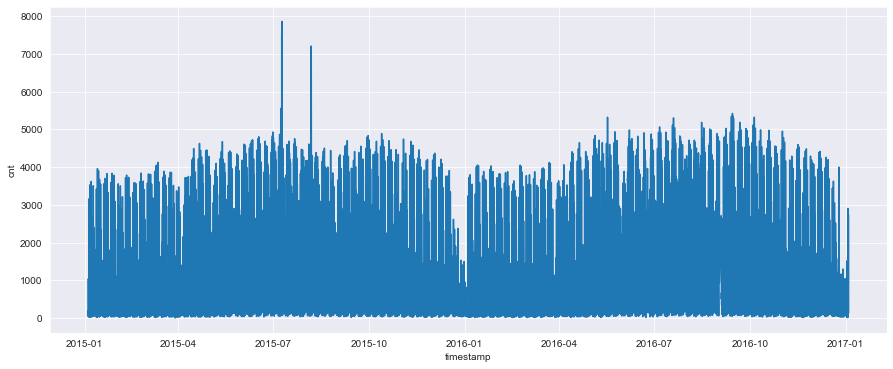

In [124]:
plt.figure(figsize = (15,6))

sns.lineplot(x = df.index, y = df.cnt)

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

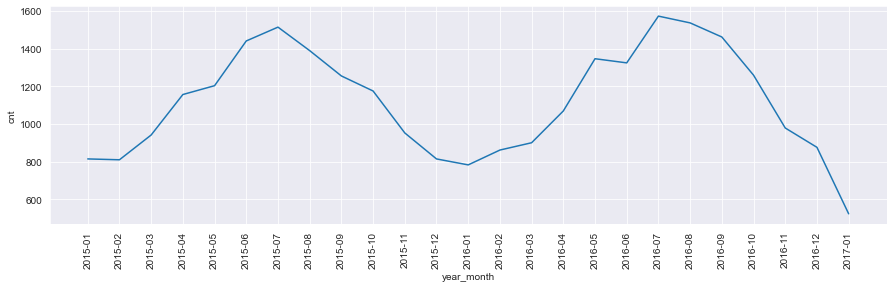

In [125]:
# with lineplot
plt.figure(figsize = (15,4))

sns.lineplot(x = df.year_month, y = df.cnt, ci = None)
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='month', ylabel='cnt'>

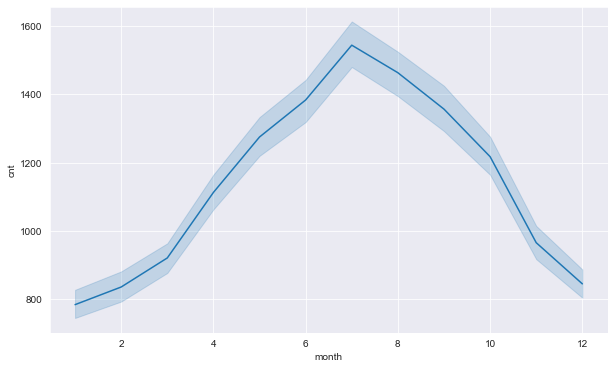

In [126]:
# with lineplot
plt.figure(figsize = (10,6))

sns.lineplot(x = df.month, y = df.cnt)

<AxesSubplot:xlabel='month', ylabel='cnt'>

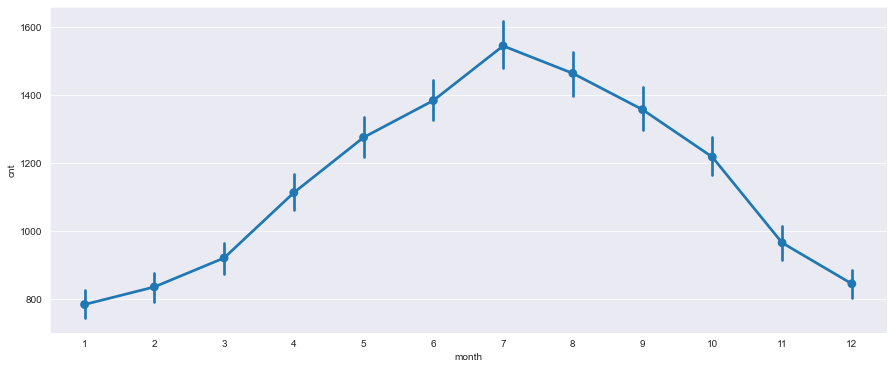

In [127]:
# with pointplot
plt.figure(figsize = (15,6))

sns.pointplot(x = df.month, y = df.cnt)

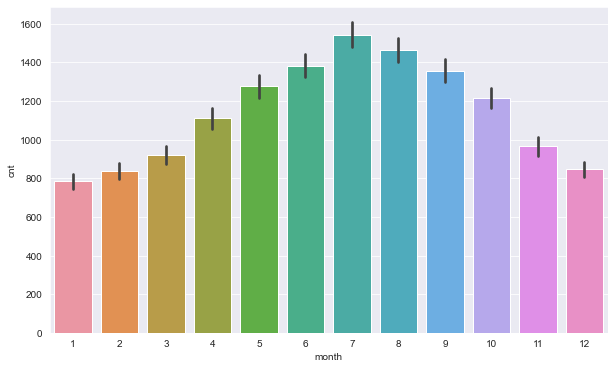

In [128]:
# with barplot
plt.figure(figsize = (10,6))

sns.barplot(x = df.month, y = df.cnt, ci=95);

### 11.Plot bike shares by hours on (holidays, weekend, season)

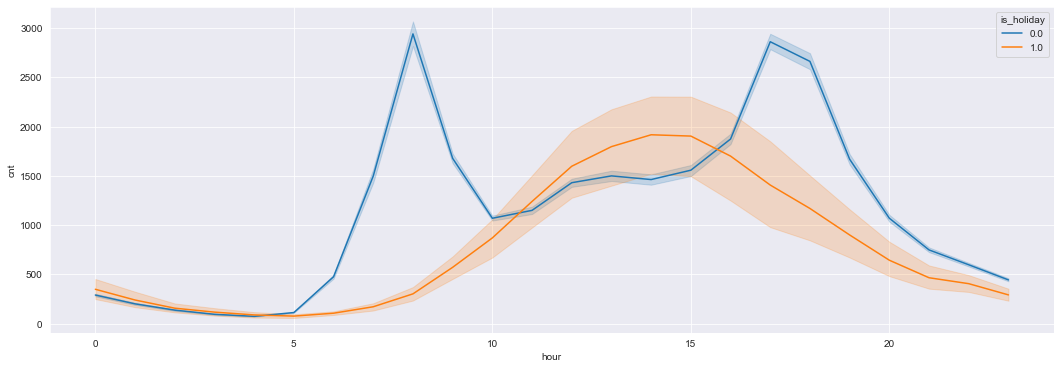

In [129]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize = (18,6))

sns.lineplot(x = df.hour, y = df.cnt, hue = df.is_holiday);


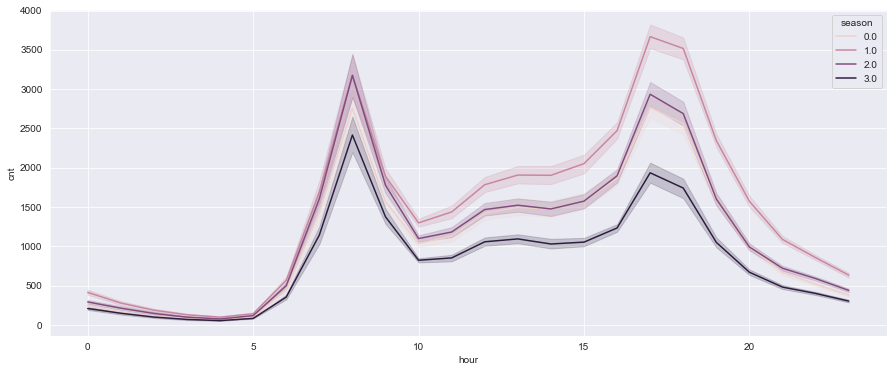

In [130]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize = (15,6))

sns.lineplot(x = df.hour, y = df.cnt, hue = df.season);

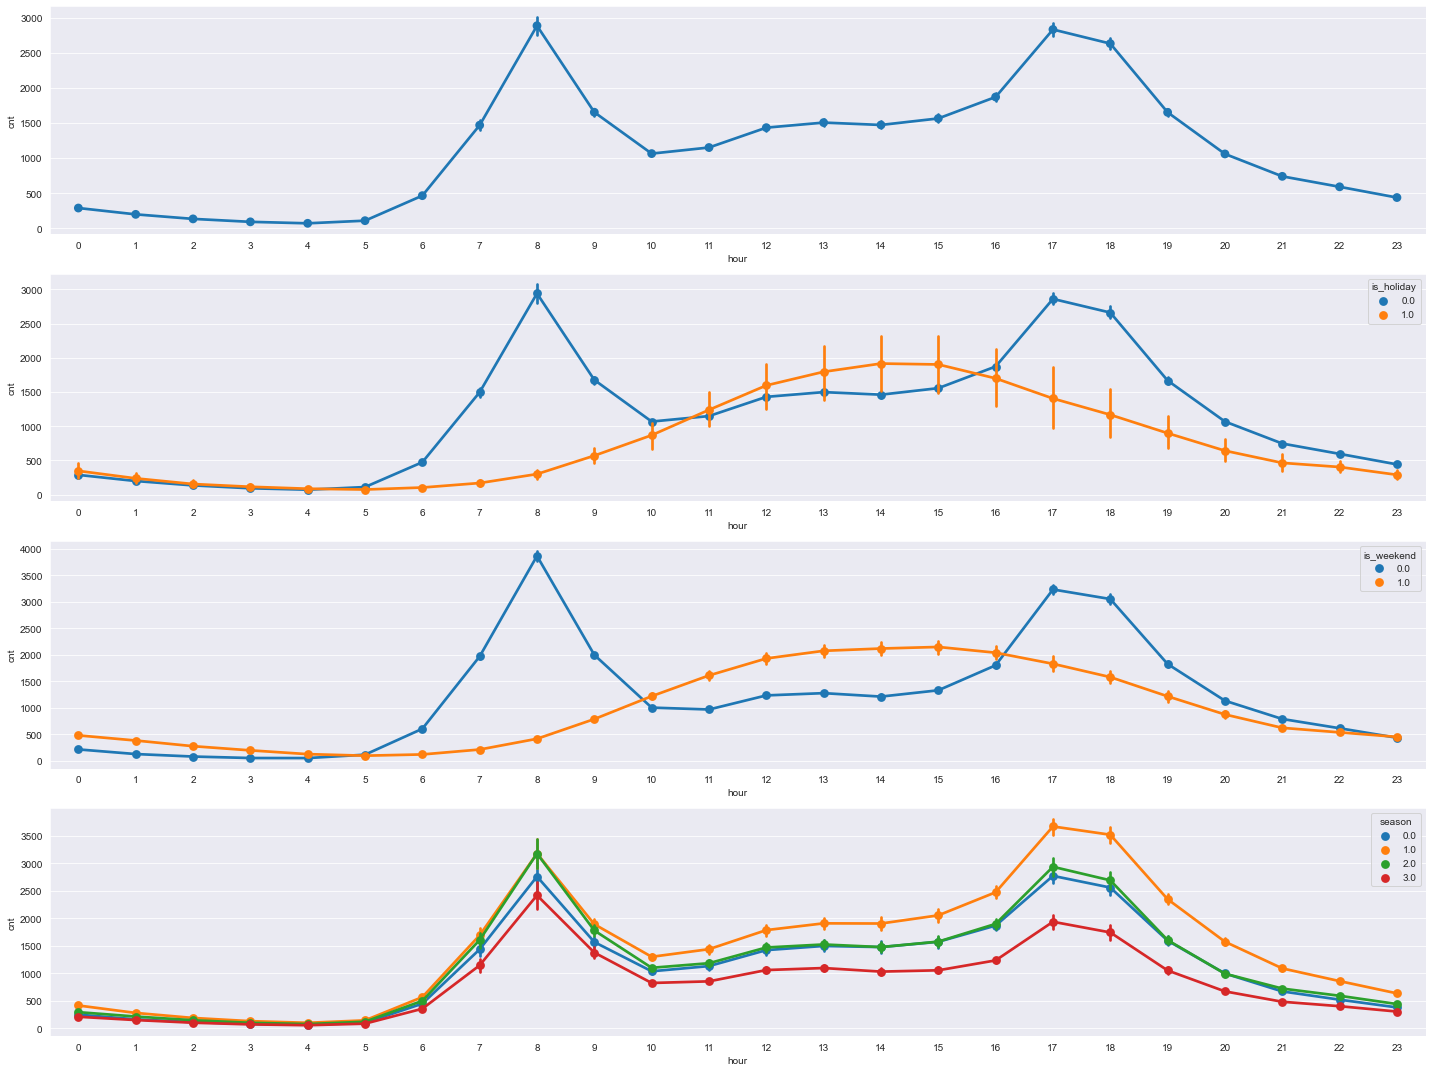

In [133]:

# with pointplot
fig, ax = plt.subplots(4, 1, figsize = (20, 15))

sns.pointplot(x = df.hour, y = df.cnt, ax=ax[0])
sns.pointplot(x = df.hour, y = df.cnt, hue = df.is_holiday, ax = ax[1])
sns.pointplot(x = df.hour, y = df.cnt, hue = df.is_weekend, ax = ax[2])
sns.pointplot(x = df.hour, y = df.cnt, hue = df.season, ax = ax[3])
plt.tight_layout();

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

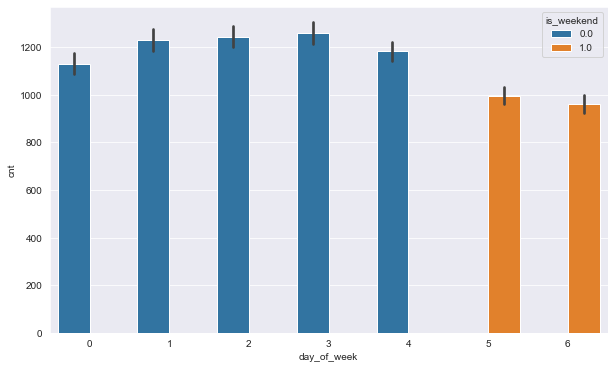

In [134]:
# with barplot
plt.figure(figsize=(10,6))

sns.barplot(x = df.day_of_week, y = df.cnt, hue = df.is_weekend)

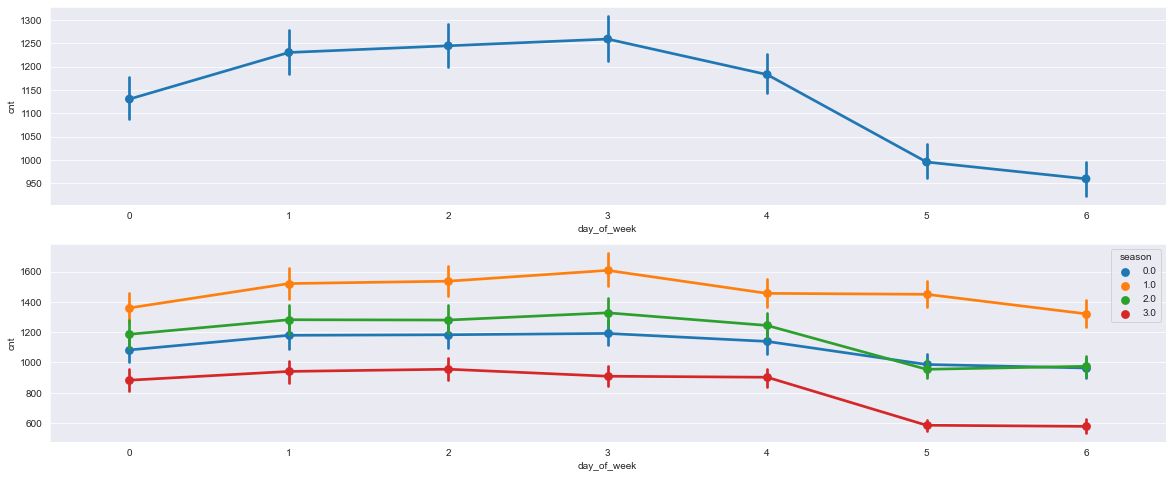

In [135]:
# with pointplot
fig, ax = plt.subplots(2, 1, figsize = (20, 8))

sns.pointplot(x = df.day_of_week, y = df.cnt, ax=ax[0])
sns.pointplot(x = df.day_of_week, y = df.cnt, hue = df.season, ax = ax[1]);

### 13.Plot bike shares by day of month

In [136]:
pd.DataFrame(df.groupby("day_of_month")["cnt"].mean()).astype("int").T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


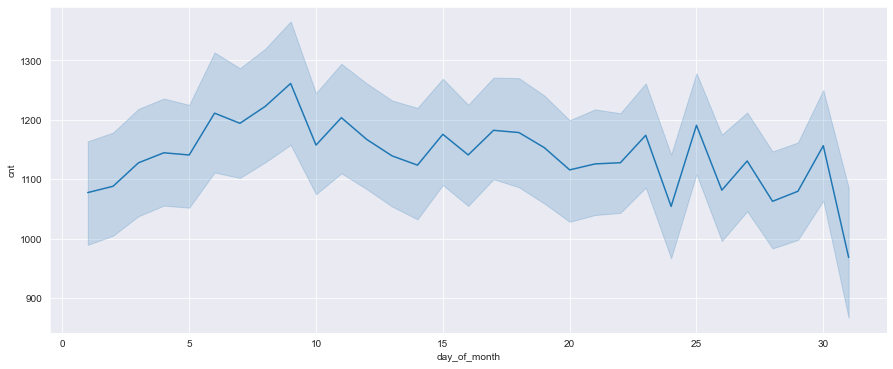

In [137]:
#with lineplot

#with lineplot
plt.figure(figsize=(15, 6))

sns.lineplot(x = df.day_of_month, y = df.cnt);
pd.DataFrame(df.groupby("day_of_month")["cnt"].mean()).astype("int").T

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

In [139]:
df[df["is_holiday"] == 1]["season"]

timestamp
2015-04-03 00:00:00    0.0
2015-04-03 01:00:00    0.0
2015-04-03 02:00:00    0.0
2015-04-03 03:00:00    0.0
2015-04-03 04:00:00    0.0
                      ... 
2017-01-02 19:00:00    3.0
2017-01-02 20:00:00    3.0
2017-01-02 21:00:00    3.0
2017-01-02 22:00:00    3.0
2017-01-02 23:00:00    3.0
Name: season, Length: 384, dtype: float64

<AxesSubplot:xlabel='year', ylabel='cnt'>

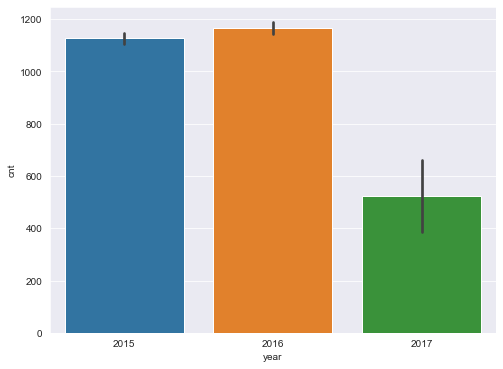

In [140]:
# with barplot
# with barplot

plt.figure(figsize=(8,6))

sns.barplot(x=df.year, y=df.cnt)

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [141]:
df["is_weekend"].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

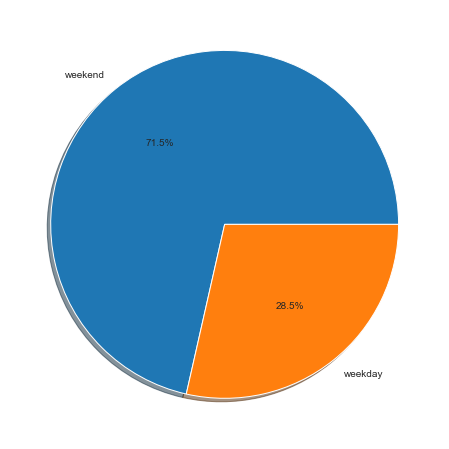

In [142]:
# pie chart
labels =  ['weekend', 'weekday']
sizes = df["is_weekend"].value_counts()

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True) #  startangle=90
# ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [143]:
# with countplot

df["is_weekend"].value_counts().sum()


17414

In [144]:
zero_pct = round((df["is_weekend"].value_counts()[0]) / (df["is_weekend"].value_counts().sum()) * 100, 1)
zero_pct

71.5

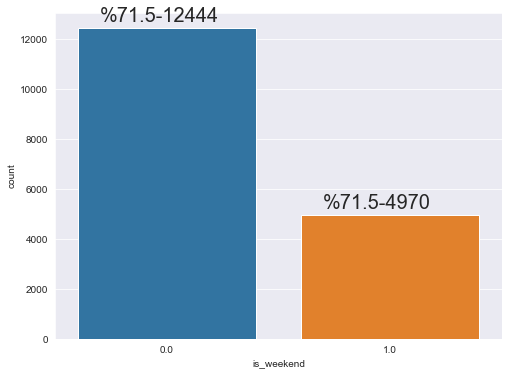

In [145]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x=df.is_weekend)
for p in ax.patches:
    ax.annotate("%" + str(zero_pct) + "-" + str(p.get_height()), (p.get_x() + 0.1, p.get_height()+250), fontsize = 20);

### 16.Plot the distribution of weather code by seasons

In [146]:
# with countplot
df.weather_code.value_counts()


1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [147]:
df.cnt.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

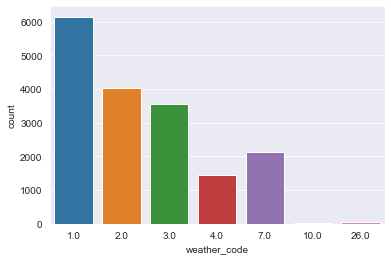

In [148]:
sns.countplot(x=df.weather_code.sort_values());

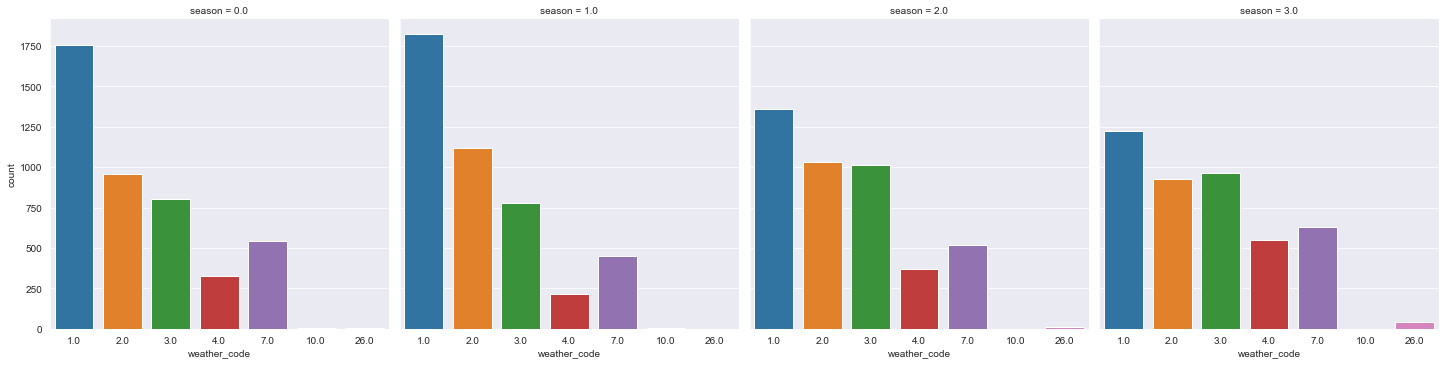

In [149]:
# with catplot
sns.catplot(x="weather_code", data=df, col = "season", kind= "count");

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___